# London Choropleth

## Imports

In [58]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import patheffects
from shapely import wkt
from shapely.geometry import MultiPoint
from shapely.ops import voronoi_diagram

## Settings

In [59]:
# And system font so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

## Shape file

Source shape 1: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london  
Source shape 2: https://data.london.gov.uk/dataset/london_boroughs

## Read shape file and data

In [60]:
wards = gpd.read_file(
    "../data/shapes/London_Ward.shx"
)
boroughs = gpd.read_file(
    "../data/shapes/London_Boroughs.gpkg"
)

stadiums = pd.read_csv(
    "../data/london_stadiums_data.csv"
)

In [61]:
type(wards)

geopandas.geodataframe.GeoDataFrame

In [62]:
type(boroughs)

geopandas.geodataframe.GeoDataFrame

In [63]:
wards

,geometry
0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,"POLYGON ((521201.203 169275.505, 521204.303 16..."
...,...
652,"POLYGON ((533315.597 180988.802, 533305.703 18..."
653,"POLYGON ((533005.698 181612.203, 533099.098 18..."
654,"POLYGON ((532552.797 181289.396, 532554.198 18..."
655,"POLYGON ((533814.299 180968.898, 533757.202 18..."


In [64]:
boroughs

,objectid,name,gss_code,hectares,nonld_area,ons_inner,sub_2011,geometry
0,1,Kingston upon Thames,E09000021,3726.117,0.000,F,South,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,2,Croydon,E09000008,8649.441,0.000,F,South,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,3,Bromley,E09000006,15013.487,0.000,F,South,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,4,Hounslow,E09000018,5658.541,60.755,F,West,"POLYGON ((509703.400 175356.600, 509712.600 17..."
4,5,Ealing,E09000009,5554.428,0.000,F,West,"POLYGON ((515647.200 178787.800, 515608.800 17..."
5,6,Havering,E09000016,11445.735,210.763,F,East,"POLYGON ((553564.000 179127.100, 553558.800 17..."
6,7,Hillingdon,E09000017,11570.063,0.000,F,West,"POLYGON ((507187.700 174163.700, 507160.800 17..."
7,8,Harrow,E09000015,5046.330,0.000,F,West,"POLYGON ((515767.200 186062.800, 515761.000 18..."
8,9,Brent,E09000005,4323.270,0.000,F,West,"POLYGON ((515767.200 186062.800, 515860.000 18..."
9,10,Barnet,E09000003,8674.837,0.000,F,North,"POLYGON ((517435.200 194421.100, 517437.400 19..."


### Check CRS

Coordinate systems

In [65]:
wards.crs

In [66]:
boroughs.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

`shape` doesn't have any CRS set. Let's use CRS from `shape2`

In [67]:
wards.set_crs(
    boroughs.crs,
    inplace=True
)

wards.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

### Stadium data

Data comes from google maps and they use `WGS 1984 (WGS 84)`

In [68]:
stadiums

,Club,Stadium,Capacity,Founded,Division,point
0,Arsenal,Emirates Stadium,60704,1886,Premier League,POINT (-0.1084082 51.5550779)
1,Brentford,Brentford Community Stadium,18250,1889,Premier League,POINT (-0.2886482 51.4907918)
2,Chelsea,Stamford Bridge,40343,1905,Premier League,POINT (-0.1909565 51.481663)
3,Fulham,Craven Cottage,29600,1879,Premier League,POINT (-0.2216078 51.4749003)
4,Tottenham Hotspur,Tottenham Hotspur Stadium,62850,1882,Premier League,POINT (-0.06622309999999998 51.60422049999999)
5,West Ham United,London Stadium,62500,1895,Premier League,POINT (-0.0172211 51.5386761)
6,Millwall,The Den,20146,1885,EFL Championship,POINT (-0.0509078 51.48593069999999)
7,Queens Park Rangers,Loftus Road,18439,1882,EFL Championship,POINT (-0.232207 51.5092577)
8,Charlton Athletic,The Valley,27111,1905,EFL League One,POINT (0.03687460000000001 51.4870682)
9,Leyton Orient,Brisbane Road,9271,1881,EFL League One,POINT (-0.0118736 51.5602379)


In [69]:
stadiums_geo = gpd.GeoDataFrame(
    stadiums.iloc[:, :-1],
    crs="EPSG:4326",
    geometry=[wkt.loads(p) for p in stadiums["point"]]
)

stadiums_geo

,Club,Stadium,Capacity,Founded,Division,geometry
0,Arsenal,Emirates Stadium,60704,1886,Premier League,POINT (-0.10841 51.55508)
1,Brentford,Brentford Community Stadium,18250,1889,Premier League,POINT (-0.28865 51.49079)
2,Chelsea,Stamford Bridge,40343,1905,Premier League,POINT (-0.19096 51.48166)
3,Fulham,Craven Cottage,29600,1879,Premier League,POINT (-0.22161 51.47490)
4,Tottenham Hotspur,Tottenham Hotspur Stadium,62850,1882,Premier League,POINT (-0.06622 51.60422)
5,West Ham United,London Stadium,62500,1895,Premier League,POINT (-0.01722 51.53868)
6,Millwall,The Den,20146,1885,EFL Championship,POINT (-0.05091 51.48593)
7,Queens Park Rangers,Loftus Road,18439,1882,EFL Championship,POINT (-0.23221 51.50926)
8,Charlton Athletic,The Valley,27111,1905,EFL League One,POINT (0.03687 51.48707)
9,Leyton Orient,Brisbane Road,9271,1881,EFL League One,POINT (-0.01187 51.56024)


In [70]:
stadiums_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Convert to `British National Grid` CRS

In [71]:
stadiums_geo.to_crs(
    crs=boroughs.crs,
    inplace=True
)

stadiums_geo

,Club,Stadium,Capacity,Founded,Division,geometry
0,Arsenal,Emirates Stadium,60704,1886,Premier League,POINT (531237.366 185716.648)
1,Brentford,Brentford Community Stadium,18250,1889,Premier League,POINT (518909.716 178259.912)
2,Chelsea,Stamford Bridge,40343,1905,Premier League,POINT (525716.698 177407.814)
3,Fulham,Craven Cottage,29600,1879,Premier League,POINT (523606.690 176603.633)
4,Tottenham Hotspur,Tottenham Hotspur Stadium,62850,1882,Premier League,POINT (534017.196 191257.966)
5,West Ham United,London Stadium,62500,1895,Premier League,POINT (537608.091 184060.157)
6,Millwall,The Den,20146,1885,EFL Championship,POINT (535428.244 178131.964)
7,Queens Park Rangers,Loftus Road,18439,1882,EFL Championship,POINT (522778.363 180406.511)
8,Charlton Athletic,The Valley,27111,1905,EFL League One,POINT (541519.172 178424.371)
9,Leyton Orient,Brisbane Road,9271,1881,EFL League One,POINT (537913.748 186467.946)


In [72]:
stadiums_geo["Division"].unique()

array(['Premier League', 'EFL Championship', 'EFL League One',
       'EFL League Two'], dtype=object)

In [73]:
len(stadiums_geo["Division"].unique())

4

### Vornoi regions

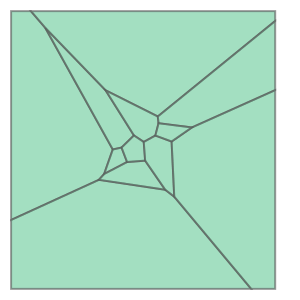

In [74]:
regions = voronoi_diagram(
    MultiPoint(
        list(stadiums_geo["geometry"])
    )
)

regions

In [75]:
regions.geoms

In [76]:
list(regions.geoms)

[<POLYGON ((492372.117 217795.565, 498039.666 217795.565, 502159.121 213007.5...>,
 <POLYGON ((492372.117 138182.767, 492372.117 157939.707, 517518.719 169438.5...>,
 <POLYGON ((502159.121 213007.573, 519453.149 195096.177, 527571.301 182164.0...>,
 <POLYGON ((568056.771 217795.565, 568056.771 214968.365, 534406.483 187594.7...>,
 <POLYGON ((527571.301 182164.029, 519453.149 195096.177, 534406.483 187594.7...>,
 <POLYGON ((525598.941 174546.577, 519031.473 171117.08, 521507.234 178137.98...>,
 <POLYGON ((519031.473 171117.08, 525598.941 174546.577, 530783.391 174941.25...>,
 <POLYGON ((530384.18 180295.058, 530783.391 174941.257, 525598.941 174546.57...>,
 <POLYGON ((530783.391 174941.257, 530384.18 180295.058, 533705.571 182130.27...>,
 <POLYGON ((568056.771 195149.321, 544184.002 184448.674, 534623.947 185662.2...>,
 <POLYGON ((568056.771 138182.767, 561179.817 138182.767, 539130.391 164599.2...>,
 <POLYGON ((533705.571 182130.276, 534623.947 185662.275, 544184.002 184448.6...>]

In [77]:
regions_geo = gpd.GeoDataFrame(
    crs=boroughs.crs,
    geometry=list(regions.geoms)
)

In [78]:
regions_geo

,geometry
0,"POLYGON ((492372.117 217795.565, 498039.666 21..."
1,"POLYGON ((492372.117 138182.767, 492372.117 15..."
2,"POLYGON ((502159.121 213007.573, 519453.149 19..."
3,"POLYGON ((568056.771 217795.565, 568056.771 21..."
4,"POLYGON ((527571.301 182164.029, 519453.149 19..."
5,"POLYGON ((525598.941 174546.577, 519031.473 17..."
6,"POLYGON ((519031.473 171117.080, 525598.941 17..."
7,"POLYGON ((530384.180 180295.058, 530783.391 17..."
8,"POLYGON ((530783.391 174941.257, 530384.180 18..."
9,"POLYGON ((568056.771 195149.321, 544184.002 18..."


In [79]:
divisions = []

for poly in regions_geo["geometry"]:
    for pt, d in zip(stadiums_geo["geometry"], stadiums_geo["Division"]):
        if poly.contains(pt):
            divisions.append(d)
            break

regions_geo["Divisions"] = divisions
regions_geo

,geometry,Divisions
0,"POLYGON ((492372.117 217795.565, 498039.666 21...",Premier League
1,"POLYGON ((492372.117 138182.767, 492372.117 15...",EFL League Two
2,"POLYGON ((502159.121 213007.573, 519453.149 19...",EFL Championship
3,"POLYGON ((568056.771 217795.565, 568056.771 21...",Premier League
4,"POLYGON ((527571.301 182164.029, 519453.149 19...",Premier League
5,"POLYGON ((525598.941 174546.577, 519031.473 17...",Premier League
6,"POLYGON ((519031.473 171117.080, 525598.941 17...",EFL League Two
7,"POLYGON ((530384.180 180295.058, 530783.391 17...",Premier League
8,"POLYGON ((530783.391 174941.257, 530384.180 18...",EFL Championship
9,"POLYGON ((568056.771 195149.321, 544184.002 18...",EFL League One


## Plot

In [80]:
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 14
    }
)

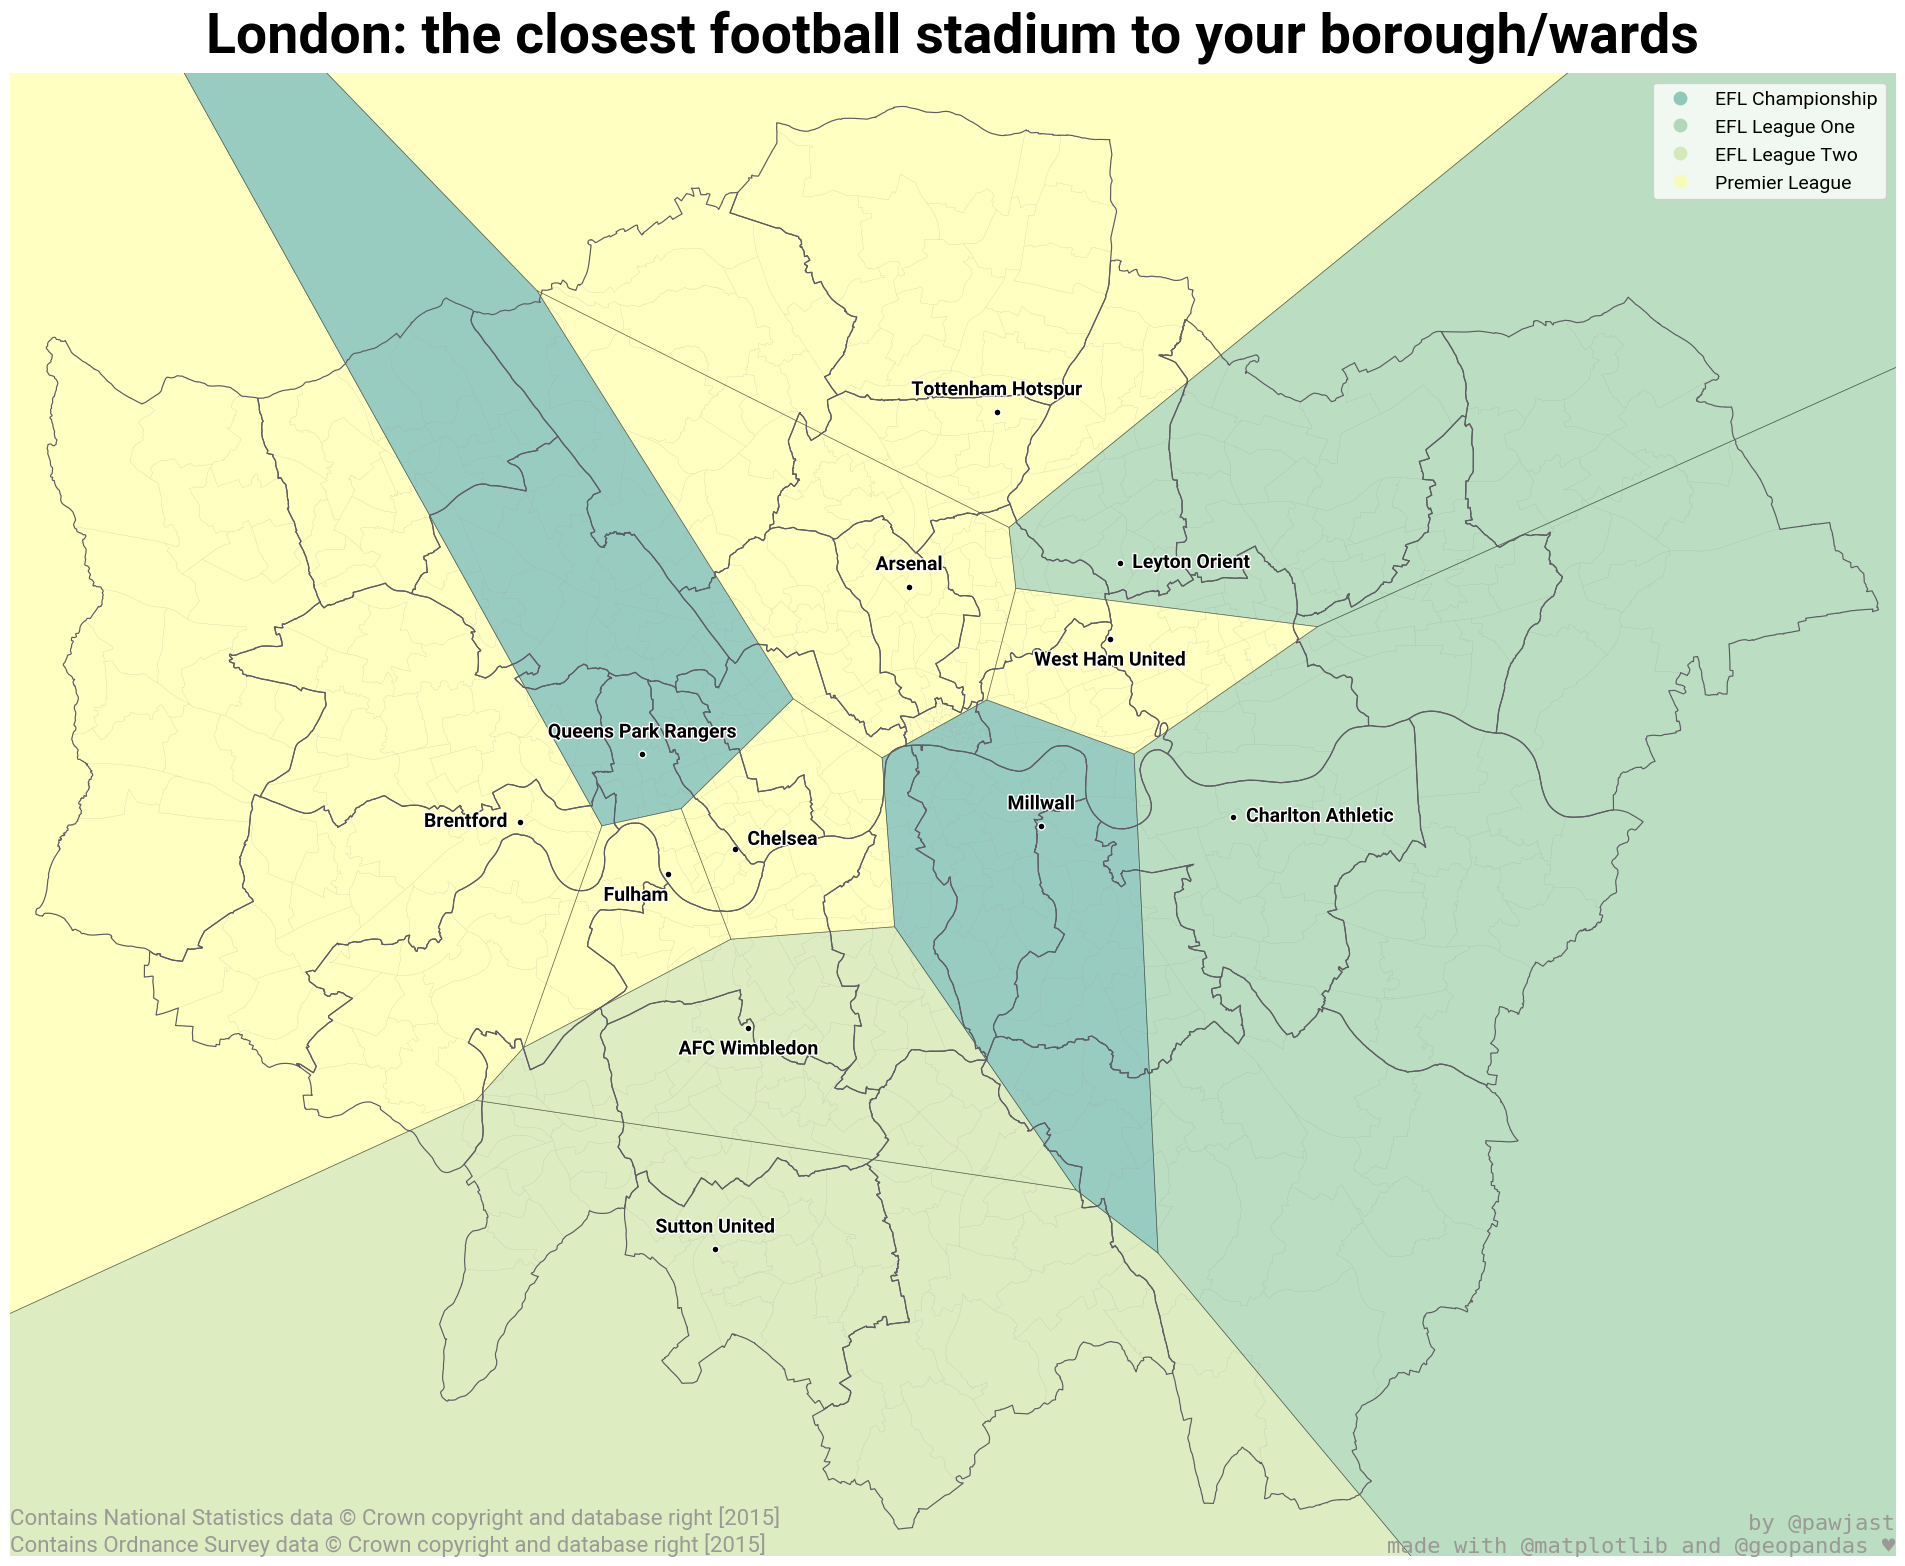

In [81]:
fig, ax = plt.subplots(
    figsize=(20, 16),
    facecolor="white"
)

fig.suptitle(
    "London: the closest football stadium to your borough/wards",
    fontsize=40,
    weight="bold"
)

# PLOT DATA
# vornoi regions
ax = regions_geo.plot(
    ax=ax,
    column="Divisions",
    alpha=0.40,
    edgecolor="black",
    lw=.5,
    legend=True,
    cmap="summer"
)

ax = boroughs.boundary.plot(
    ax=ax,
    color="#5e5c64",
    lw=.85
)

ax = wards.plot(
    ax=ax,
    edgecolor="#9a9996",
    lw=0.05,
    color=(1, 1, 1, 0)
)

ax = stadiums_geo.plot(
    ax=ax,
    color="black",
    edgecolor="white",
    marker=".",
    markersize=100
)


# ADD LABELS
for row in stadiums_geo.iterrows():
    offset_val = 400
    offset_x = 0
    offset_y = offset_val

    if row[1]["Club"] in ["West Ham United", "AFC Wimbledon"] :
        ha_val="center"
        va_val="top"
        offset_y = -offset_val
    elif row[1]["Club"] in ["Leyton Orient", "Charlton Athletic"]:
        ha_val="left"
        va_val="center"
        offset_x = offset_val
        offset_y = 0
    elif row[1]["Club"] == "Chelsea":
        ha_val="left"
        va_val="bottom"
        offset_x = offset_val
        offset_y = 0
    elif row[1]["Club"] == "Fulham":
        ha_val="right"
        va_val="top"
        offset_x = 0
        offset_y = -offset_val
    elif row[1]["Club"] == "Brentford":
        ha_val="right"
        va_val="center"
        offset_x = -offset_val
        offset_y = 0
    else:
        ha_val="center"
        va_val="bottom"

    ax.text(
        x=row[1]["geometry"].x + offset_x,
        y=row[1]["geometry"].y + offset_y,
        s=row[1]["Club"],
        ha=ha_val,
        va=va_val,
        weight="bold",
        path_effects=[patheffects.withStroke(linewidth=2, foreground="white")]
    )


ax.set_xlim(502_750, 562_500)
ax.set_ylim(155_000, 202_000)
ax.set_axis_off()

plt.tight_layout()

ax.text(
    1, 0.0,
    "by @pawjast\nmade with @matplotlib and @geopandas \u2665",
    transform =ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)
ax.text(
    0, 0.0,
    "Contains National Statistics data © Crown copyright and database right [2015]\nContains Ordnance Survey data © Crown copyright and database right [2015]",
    transform =ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    ha="left"
);

# plt.savefig(
#     fname="pawjast.png",
#     format="png",
#     dpi=125
# );